<a href="https://colab.research.google.com/github/Lokeshpatnana/Pandas/blob/main/Pandas_Coding_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Analysis Process

Broadly, data analysis involves the following phases:
1. Question Phase - Asking questions
2. Wrangling Phase
  - Data Acquisition - Acquiring the data required to answer the question by various means
  - Data Cleaning - Cleaning the data so that it can be used for further analysis
3. Data Exploration Phase - Getting familiar with the data, building intuition and finding patterns.
4. Drawing Conclusions Phase  - Arriving at conclusions based on the data or making some predictions. This phase usually involves statisitics or Machine Learning.
5. Communication Phase - Communicating your findings with the help of PPTs, blog posts etc. Data visualization can be very useful here.


**This process is not always done in this order.**

There can be a lot of going back and forth between the different phases. Especially the Wrangling Phase and Data Exploration Phase.
  - To clean problems in the data, you first need to explore the data to see what problems are there.
  - When you think you are done cleaning the data and you start exploring, you are likely to find more problems in the data, and you'll have to go back and clean the data.

Also, throughout the process, as you become more familiar with the dataset, you may need to go back and refine the question you're asking.

# Analysis On the Weather Dataset

In this assignment, you'll be answering some interesting questions on the weather dataset. It contains data about variation in weather condition in 5 different cities in the span of 2 years(2016, 2017).

In [2]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/dataset_weather.csv

--2023-11-14 08:52:55--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/dataset_weather.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.160.194, 16.12.36.114, 52.219.158.26, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.160.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130923 (128K) [text/csv]
Saving to: ‘dataset_weather.csv’

dataset_weather.csv 100%[===================>] 127.85K   196KB/s    in 0.7s    

2023-11-14 08:52:57 (196 KB/s) - ‘dataset_weather.csv’ saved [130923/130923]



Before attempting the coding questions, take a look at the datasets and understand what each column signifies.

In [3]:
weather_df = pd.read_csv("dataset_weather.csv")
weather_df

,city,date,temp,humidity,high_wind,low_wind,events
0,Auckland,2016-01-01,65,82,21,28.0,Rain
1,Auckland,2016-01-02,66,94,33,46.0,Rain
2,Auckland,2016-01-03,72,91,18,NaN,Rain
3,Auckland,2016-01-04,66,76,15,NaN,Rain
4,Auckland,2016-01-05,62,69,13,NaN,NaN
...,...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,72,13,16.0,NaN
3651,San Diego,2017-12-28,62,62,14,17.0,Fog
3652,San Diego,2017-12-29,63,58,8,10.0,Fog
3653,San Diego,2017-12-30,61,63,13,17.0,Fog


# Getting Started with Matplotlib

* **plt.bar():** Make a bar plot.
* **plt.plot():** Can be used to make a line graph.

_____________________________________________________________________________
* **plt.xticks():** A list of positions at which ticks should be placed.
* **plt.xlabel(label_name):** Set the label for the x-axis.
* **plt.ylabel(label_name):** Set the label for the y-axis.

* **plt.show():** Display a figure.
* **plt.grid():** Configure the grid lines.

______________________________________________________________________________

* **plt.subplots():** Add a subplot to the current figure. It returns two arguments fig and ax where fig is figure and ax can be either a single Axes object or an array of Axes objects.
* **ax.twinx():** Creates a twin Axes sharing the xaxis.
* **ax.set_xlabel():** Set the label for the x-axis.
* **ax.set_ylabel():** Set the label for the y-axis.
* **ax.set_xticklabels():** Set the xaxis' labels with list of string labels.



### ***Refer to the [matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/index.html) for more details.***

## **Example 1**


5 students' marks are plotted on a bar graph.

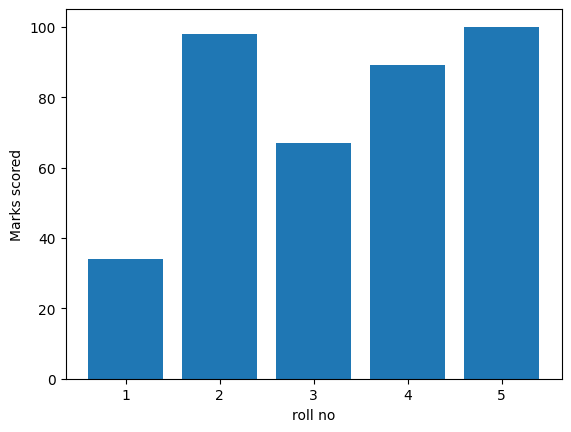

In [4]:
import matplotlib.pyplot as plt
marks_scored = [34, 98, 67, 89, 100]
roll_no = range(1, 6)
plt.bar(roll_no, marks_scored)
plt.xticks(roll_no)
plt.xlabel('roll no')
plt.ylabel('Marks scored')
plt.show()

## **Example 2**

Plot y versus x as lines and/or markers.

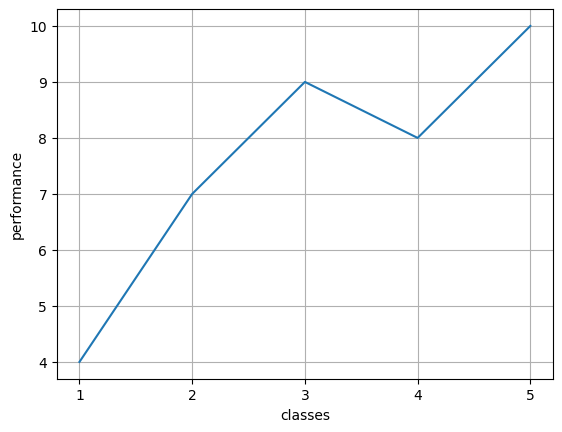

In [5]:
classes = [1,2,3,4,5]
performance = [4, 7, 9, 8, 10]

plt.plot(classes, performance)
plt.xticks(classes)
plt.xlabel('classes')
plt.ylabel('performance')
plt.grid()
plt.show()

## **Example 3**

Create a set of subplots in a single graph

<ipython-input-6-35460ef1e3fe>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


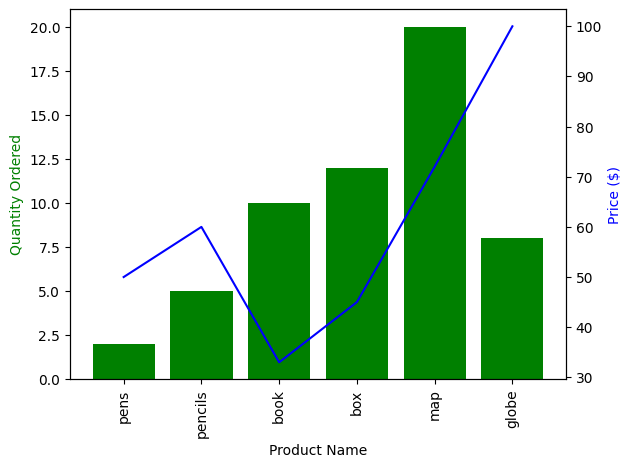

In [6]:
prices = [50, 60, 33, 45, 72, 100]
quantity = [2, 5, 10, 12, 20, 8]
products = ['pens', 'pencils', 'book', 'box', 'map', 'globe']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical')

plt.show()

#**Question 1:**

* **Which city has rainfall with the highest frequency in the year 2016?**

 ## Cleaning the data:
* Ensure that there are no rows that contain all NaN values in the data
* Ensure that the columns are of the appropriate data types
* Add new columns if needed

In [7]:
weather_df.dropna(how='all',inplace=True)
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
weather_df["events"] = weather_df["events"].astype('string')
print(weather_df.dtypes)

city                 object
date         datetime64[ns]
temp                  int64
humidity              int64
high_wind             int64
low_wind            float64
events               string
year                  int64
dtype: object


##Analysis:
* Find the frequency of rainfall events in each city.
* Find the city which has maximum frequency of rainfall.

In [8]:
rainfall_df = weather_df[(weather_df['year'] == 2016)&(weather_df['events'] == 'Rain')]
citywise_rainfall = rainfall_df.groupby('city').count()['events']
citywise_rainfall.idxmax()

'Auckland'

 ## Plotting:
* Plot a bar graph between cities and frequency of rainfall to get a visual understanding of how frequently it rained in each city over the course of the year 2016.

**Note:** To plot the graph, you can use the matplotlib library. Refer to ***Getting Started with Matplotlib*** for further details.

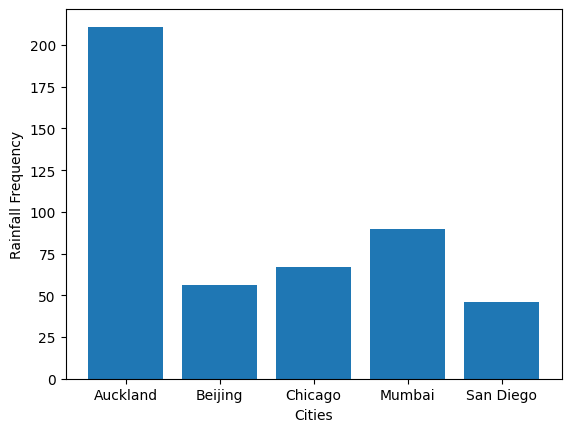

In [9]:
cities = weather_df['city'].unique()
plt.bar(citywise_rainfall.index,citywise_rainfall)
plt.xlabel('Cities')
plt.ylabel('Rainfall Frequency')
plt.show()

#**Question 2:**

* **Which month in each city has recorded the highest average temperature in the year 2017?**

 ## Cleaning the data:
* Add new columns if needed.

In [10]:
weather_df['month'] = weather_df['date'].dt.month
weather_month_names_df = weather_df.copy()
weather_month_names_df['month'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)
weather_month_names_df

,city,date,temp,humidity,high_wind,low_wind,events,year,month
0,Auckland,2016-01-01,65,82,21,28.0,Rain,2016,January
1,Auckland,2016-01-02,66,94,33,46.0,Rain,2016,January
2,Auckland,2016-01-03,72,91,18,NaN,Rain,2016,January
3,Auckland,2016-01-04,66,76,15,NaN,Rain,2016,January
4,Auckland,2016-01-05,62,69,13,NaN,<NA>,2016,January
...,...,...,...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,72,13,16.0,<NA>,2017,December
3651,San Diego,2017-12-28,62,62,14,17.0,Fog,2017,December
3652,San Diego,2017-12-29,63,58,8,10.0,Fog,2017,December
3653,San Diego,2017-12-30,61,63,13,17.0,Fog,2017,December


##Analysis:
* Find the average temperatures of each city in every month of 2017.
* Find the month in which each city has the highest average temperature.

In [11]:
weather_2017_df = weather_month_names_df[(weather_month_names_df['year'] == 2017)]
monthly_avg_temp = weather_2017_df.groupby(['city','month'])['temp'].mean()
monthly_avg_temp_df = pd.DataFrame(monthly_avg_temp)
monthly_avg_temp_df.rename(columns={"temp":"avg_temp"},inplace=True)

monthly_avg_temp_df.reset_index(inplace=True)
max_temp_indices = monthly_avg_temp_df.groupby('city')['avg_temp'].idxmax()
max_monthly_temp_df = monthly_avg_temp_df.loc[max_temp_indices]
max_monthly_temp_df

,city,month,avg_temp
3,Auckland,February,68.571429
17,Beijing,July,81.161290
29,Chicago,July,74.903226
44,Mumbai,May,85.870968
49,San Diego,August,73.322581


 ## Plotting:
* Plot a bar graph between cities and their highest monthly average temperatures to get a visual understanding temperature variation in different cities.

**Note:** To plot the graph, you can use the matplotlib library. Refer to ***Getting Started with Matplotlib*** for further details.

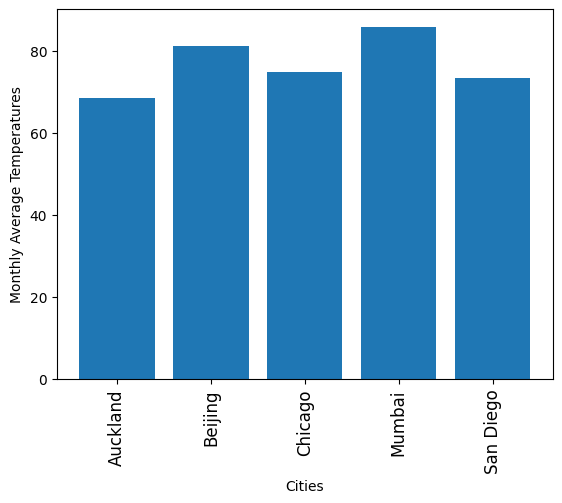

In [12]:
cities = max_monthly_temp_df['city']
avg_temperatures = max_monthly_temp_df['avg_temp']
plt.bar(cities,avg_temperatures)
plt.xticks(cities,rotation='vertical',size=12)
plt.xlabel('Cities')
plt.ylabel('Monthly Average Temperatures')
plt.show()

#**Question 3:**

* **What is the maximum and minimum humidity recorded in each city in the year 2017?**



##Analysis:
* Get the data of year 2017.
* Find the maximum and minimum humidity of each city in that data.

In [13]:
weather_2017_df = weather_df[(weather_df['year'] == 2017)]
city_weather_df = weather_2017_df.groupby('city')
humidity_df = city_weather_df['humidity'].agg(['max','min'])
humidity_df

,max,min
city,,
Auckland,97,52
Beijing,95,12
Chicago,96,29
Mumbai,95,29
San Diego,88,19


 ## Plotting:
* Plot two line graphs(in single plot) with maximum and minimim humidities on Y-axis and cities on X-axis, to get a visual understanding of humidity extremes in each city.

**Note:** To plot the graph, you can use the matplotlib library. Refer to ***Getting Started with Matplotlib*** for further details.

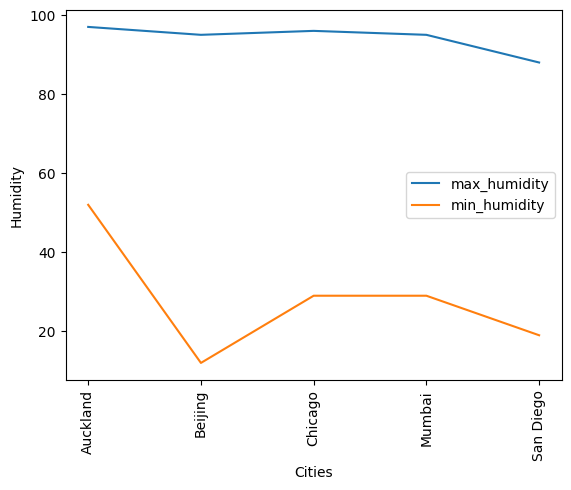

In [14]:
cities = humidity_df.index.values
max_humidity = humidity_df['max']
min_humidity = humidity_df['min']
plt.plot(cities,max_humidity,label='max humidity')
plt.plot(cities,min_humidity,label='min humidity')

plt.xticks(cities,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Humidity')
plt.legend(["max_humidity","min_humidity"])

plt.show()

#**Question 4:**

* **What is the average of `high_wind` and `low_wind` of Beijing city in between `July 2016` to `February 2017` ?**
* **What is the maximum of the average wind calculated above in each month ?**

##Analysis:
* Get the data of Beijing between `July 2016` and `February 2017`.
* Add a `average_wind` column that contains the average of `high_wind` and `low_wind ` of each day.
* Find the maximum of `average_wind` of each month from the above data.

In [15]:
beijing_df = weather_df[(weather_df['city'] == 'Beijing')&(((weather_df['year'] == 2016)&(weather_df['month'] >6)|(weather_df['year'] == 2017)&(weather_df['month'] < 3)))]
wind_cols = beijing_df.loc[:,["high_wind","low_wind"]]
beijing_df['average_wind'] = wind_cols.mean(axis=1)

max_wind = beijing_df.groupby(['year','month'])['average_wind'].max().reset_index()
max_wind["month"].replace({1:"Jan",2:"Feb",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
max_wind

<ipython-input-15-1970c5adfc7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df['average_wind'] = wind_cols.mean(axis=1)


,year,month,average_wind
0,2016,July,32.5
1,2016,Aug,30.5
2,2016,Sep,32.5
3,2016,Oct,28.0
4,2016,Nov,33.5
5,2016,Dec,39.0
6,2017,Jan,47.0
7,2017,Feb,36.5


 ## Plotting:
* Plot a line graph between maximum of `average_wind` and months in range [`July 2016`, `February 2017`] of Beijing city to get a visual understanding of wind variation across these months.

**Note:** To plot the graph, you can use the matplotlib library. Refer to ***Getting Started with Matplotlib*** for further details.

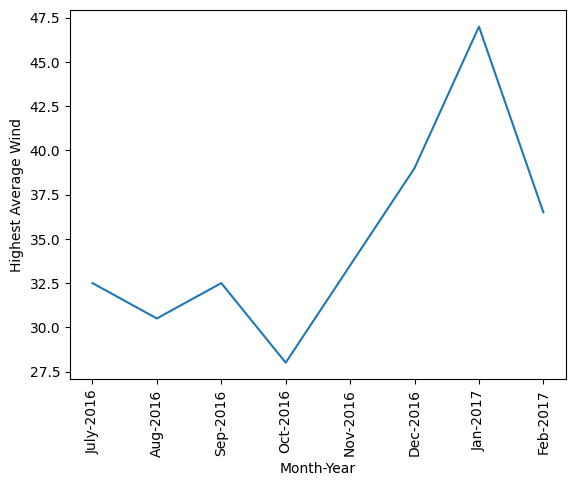

In [16]:
month_year = max_wind['month'] + '-' + max_wind['year'].astype('string')
month_year = month_year.to_list()

highest_average_wind = max_wind['average_wind']
plt.plot(month_year,highest_average_wind)

plt.xticks(month_year,rotation='vertical')
plt.xlabel("Month-Year")
plt.ylabel("Highest Average Wind")
plt.show()